In [17]:
#import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#import cleaned dataset
trips_hourly_engineered = pd.read_parquet('../../data/fiete_trips_hourly.parquet')

Weekday

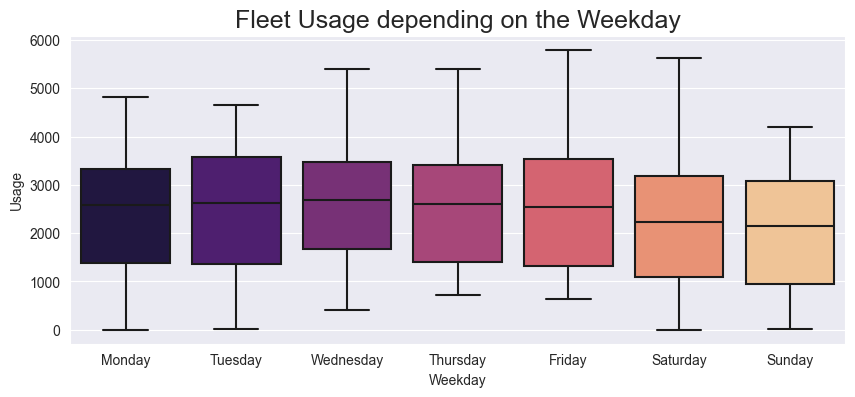

In [19]:
#create column for total of starting and ongoing trips per hour
trips_hourly_engineered["ongoing_trips_total"] = trips_hourly_engineered["trips_starting"] + trips_hourly_engineered["trips_prev_active"]

#group by weekday and plot

weekday=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

trips_hourly_engineered_weekday = trips_hourly_engineered.groupby(["day_of_year","day_of_week"])["ongoing_trips_total"].sum()
trips_hourly_engineered_weekday = pd.DataFrame(trips_hourly_engineered_weekday)

fig,ax = plt.subplots(figsize=(10,4))

sns.boxplot(x=trips_hourly_engineered_weekday.index.get_level_values(1), y=trips_hourly_engineered_weekday["ongoing_trips_total"],ax=ax, palette="magma", showfliers=False)
ax.set_title("Fleet Usage depending on the Weekday", fontsize=18, fontname="Arial")
ax.set_xlabel("Weekday")
ax.set_ylabel("Usage")
ax.set_xticklabels(weekday)
plt.show()
#ax.figure.savefig("Weekday_Usage.png")

Hour

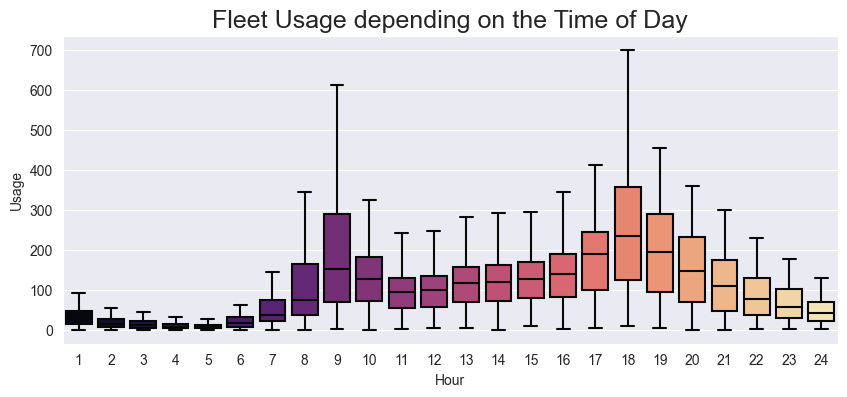

In [20]:
#group by hour and plot
time = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
trips_hourly_engineered_hour = trips_hourly_engineered.groupby(["day_of_year","hour"])["ongoing_trips_total"].sum()
trips_hourly_engineered_hour = pd.DataFrame(trips_hourly_engineered_hour)

fig,ax = plt.subplots(figsize=(10,4))

sns.boxplot(x=trips_hourly_engineered_hour.index.get_level_values(1), y=trips_hourly_engineered_hour["ongoing_trips_total"],ax=ax, palette="magma", showfliers=False)
ax.set_title("Fleet Usage depending on the Time of Day", fontsize=18, fontname="Arial")
ax.set_xlabel("Hour")
ax.set_ylabel("Usage")
ax.set_xticklabels(time)
plt.show()
#ax.figure.savefig("Time_Usage.png")

Month

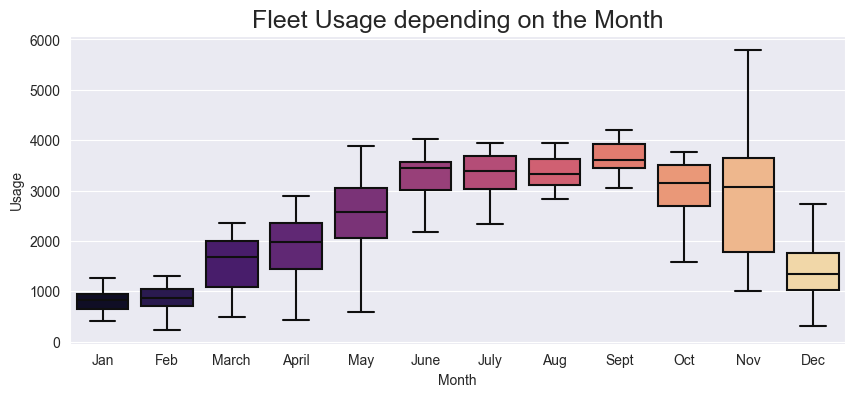

In [21]:
#group by month and plot
months = ["Jan", "Feb", "March", "April", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"]
trips_hourly_engineered_month = trips_hourly_engineered.groupby(["day_of_year","month"])["ongoing_trips_total"].sum()
trips_hourly_engineered_month = pd.DataFrame(trips_hourly_engineered_month)

fig,ax = plt.subplots(figsize=(10,4))

sns.boxplot(x=trips_hourly_engineered_month.index.get_level_values(1), y=trips_hourly_engineered_month["ongoing_trips_total"],ax=ax, palette="magma", showfliers=False)
ax.set_title("Fleet Usage depending on the Month", fontsize=18, fontname="Arial")
ax.set_xlabel("Month")
ax.set_ylabel("Usage")
ax.set_xticklabels(months)
plt.show()
#ax.figure.savefig("Month_Usage.png")